# How does Afterpay make money?
> Let's step back and analayse afterpay as a system, and consider how it actually makes money.

- toc: true 
- badges: true
- comments: true
- categories: [Bayesian,Finance]
    
- image: images/20-08-13-Modelling-Afterpays-Customer-Growth/header.png

## The Context

> Important:  Obviously I need a disclaimer. If you use anything I say as the basis for any decision, financial or otherwise, you are an idiot.

In [1]:
average_transaction_value = 150
underlying_sales = 5.2472*10**9
afterpay_income = 200.9*10**6
gross_loss = 58.7 * 10**6
net_transaction_loss = 22.2 * 10**6

afterpay_ebitda = 58.9 * 10**6


#NTL = Gross Loss - Late Fees + DEBT RECOVERY COSTs

#late fees = 0.9% of underlying_sales
#debt recovery costs = 0.2% of underlying_sales  
afterpay_income = 200.9*10**6 #revenue from merchants


    

In [2]:
#underlying_sales * 1.1/100.0
underlying_sales * 0.9/100.0



47224800.0

In [3]:
gross_loss - net_transaction_loss

36500000.0

In [4]:
47224800.0 - 36500000.0

10724800.0

In [5]:
%matplotlib inline
import pymc3 as pm
import matplotlib.pyplot as plt
import numpy as np
import math

plt.rcParams["figure.figsize"] = (10,10)
from warnings import filterwarnings
filterwarnings('ignore')


In [10]:
with pm.Model() as model:
    average_transaction_value = pm.Uniform('average_transaction_value', lower=144.50, upper=154.49)
    
    average_default_fee = pm.Uniform('average_default_fee',lower = 10, upper = 68)
    
    #gross_default_loss =  pm.Uniform('gross_default_loss', lower = 1.05/100.0*underlying_sales, upper = 1.149/100.0*underlying_sales)
    gross_default_loss = 58.7 * 10**6 
    
    #late_fees_rev = pm.Uniform('late_fees_rev', lower = 0.85/100.0*underlying_sales, upper = 0.949/100.0*underlying_sales)
    late_fees_rev = 46.1 * 10**6 
    
    number_of_transactions = pm.Deterministic('number_of_transactions', underlying_sales/average_transaction_value)
    
    default_rate = pm.Deterministic('default_rate',late_fees_rev / (number_of_transactions * average_default_fee))
    
    average_default_size = pm.Deterministic('average_default_size', gross_default_loss/(number_of_transactions*default_rate))
    
    prior_checks = pm.sample_prior_predictive(samples=50_000, random_seed=0)
    

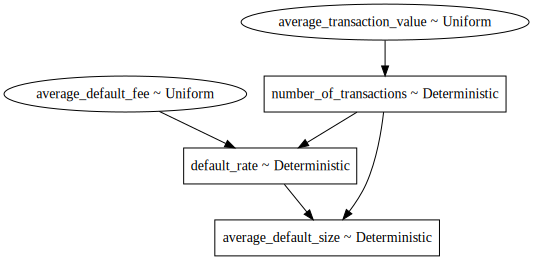

In [11]:
pm.model_to_graphviz(model)

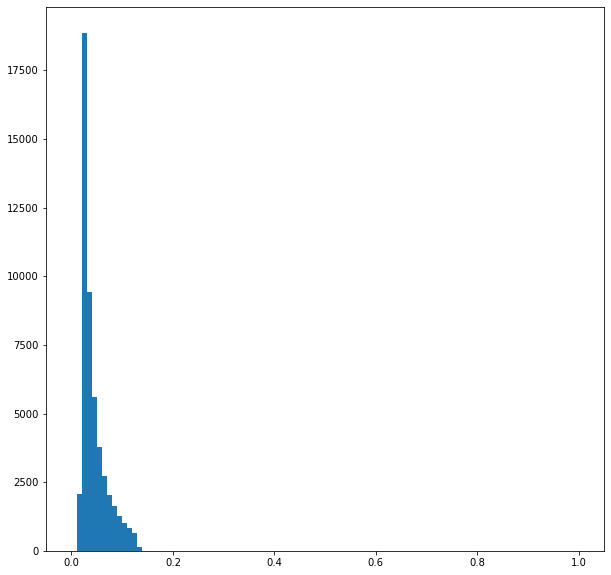

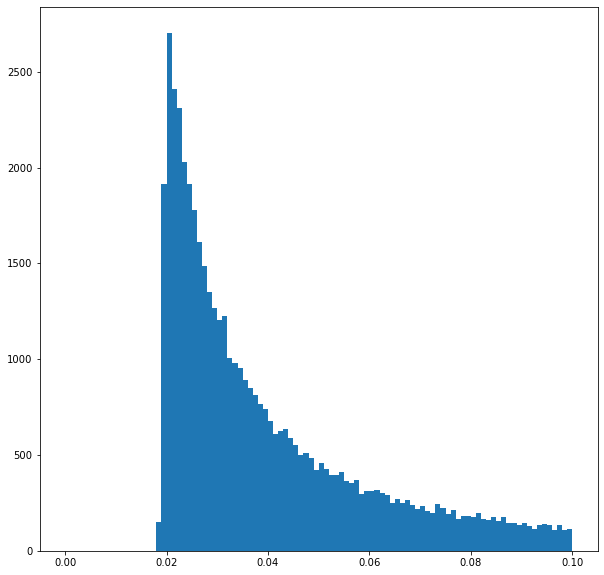

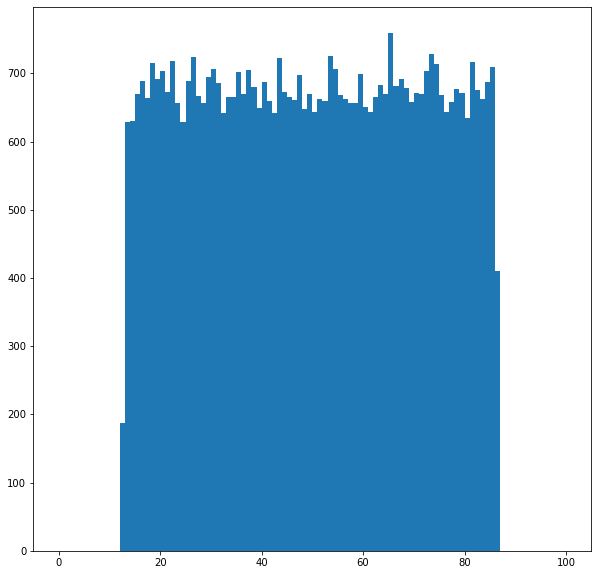

In [12]:

plt.hist(prior_checks["default_rate"],bins=np.linspace(0,1,101))
plt.show()


plt.hist(prior_checks["default_rate"],bins=np.linspace(0,0.1,101))
plt.show()


plt.hist(prior_checks["average_default_size"],bins=np.linspace(0,100,101))
plt.show()


In [13]:
(gross_default_loss / late_fees_rev)

1.2733188720173536